# Iris Flower Classification

### Group 5 - MLA Clustering and Classification Algorithm

In [55]:
# Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Imported Dataset (IRIS) CSV

In [56]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [58]:
# Checking the dataset
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Visualize Features of IRIS Flower

In [59]:
setosa = df[df['species'] == 'Iris-setosa']
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iris-virginica']

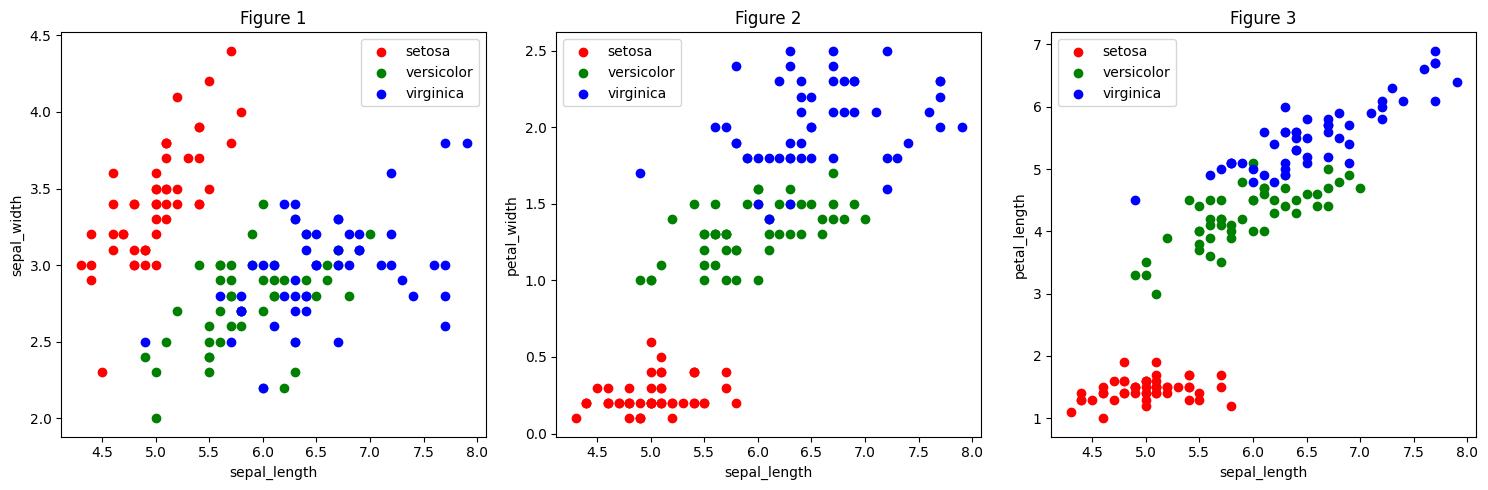

In [60]:
# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Figure 1 =================================================================================================
axes[0].scatter(setosa['sepal_length'], setosa['sepal_width'], label='setosa', color='red')
axes[0].scatter(versicolor['sepal_length'], versicolor['sepal_width'], label='versicolor', color='green')
axes[0].scatter(virginica['sepal_length'], virginica['sepal_width'], label='virginica', color='blue')

axes[0].set_title('Figure 1')
axes[0].set_xlabel('sepal_length')
axes[0].set_ylabel('sepal_width')

axes[0].legend()

# Figure 2 ================================================================================================
axes[1].scatter(setosa['sepal_length'], setosa['petal_width'], label='setosa', color='red')
axes[1].scatter(versicolor['sepal_length'], versicolor['petal_width'], label='versicolor', color='green')
axes[1].scatter(virginica['sepal_length'], virginica['petal_width'], label='virginica', color='blue')

axes[1].set_title('Figure 2')
axes[1].set_xlabel('sepal_length')
axes[1].set_ylabel('petal_width')

axes[1].legend()

# Figure 3 ================================================================================================
axes[2].scatter(setosa['sepal_length'], setosa['petal_length'], label='setosa', color='red')
axes[2].scatter(versicolor['sepal_length'], versicolor['petal_length'], label='versicolor', color='green')
axes[2].scatter(virginica['sepal_length'], virginica['petal_length'], label='virginica', color='blue')

axes[2].set_title('Figure 3')
axes[2].set_xlabel('sepal_length')
axes[2].set_ylabel('petal_length')

axes[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Labeling Species

In [61]:
# Labeling Species
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [63]:
X = df.drop(columns=['species'])
y = df['species']
X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32


### Start Training

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [66]:
X_train.shape

(105, 4)

In [67]:
sc = StandardScaler()
print(X_train[:1])
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:1])

    sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [68]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [69]:
model = Sequential()
model.add(Dense(units = 32, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(Dense(units = 32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [70]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                160       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 3s - loss: 1.1266 - accuracy: 0.3524 - 3s/epoch - 642ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1244 - accuracy: 0.3048 - 15ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0789 - accuracy: 0.4381 - 5ms/epoch - 1ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9905 - accuracy: 0.5143 - 16ms/epoch - 4ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9368 - accuracy: 0.5524 - 16ms/epoch - 4ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8723 - accuracy: 0.6762 - 28ms/epoch - 7ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8346 - accuracy: 0.7143 - 14ms/epoch - 4ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8334 - accuracy: 0.7429 - 18ms/epoch - 5ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7877 - accuracy: 0.6952 - 22ms/epoch - 5ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7068 - accuracy: 0.7429 - 11ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7178 - accuracy: 0.7619 - 8ms/epoch - 2ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7147 - accuracy: 0.7524 - 16ms/epoch - 4ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6687 - accuracy: 0.

In [72]:
prediction = model.predict(X_test)
print(prediction[:5])

2/2 [==============================] - 0s 16ms/step
[[9.9990094e-01 4.9075370e-05 4.9987153e-05]
 [2.4783481e-02 8.9819723e-01 7.7019371e-02]
 [9.9953902e-01 3.1649318e-04 1.4455512e-04]
 [3.1676516e-04 6.1914595e-03 9.9349171e-01]
 [9.9934918e-01 4.2576986e-04 2.2508827e-04]]


In [73]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])
print(len(prediction))

[0 1 0 2 0]
45


In [74]:
print(y_test[:5])
y_test = np.array(y_test)
print(y_test[:5])
print(len(y_test))

4      0
58     1
20     0
114    2
31     0
Name: species, dtype: int32
[0 1 0 2 0]
45


In [75]:
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [76]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'Actual Species')

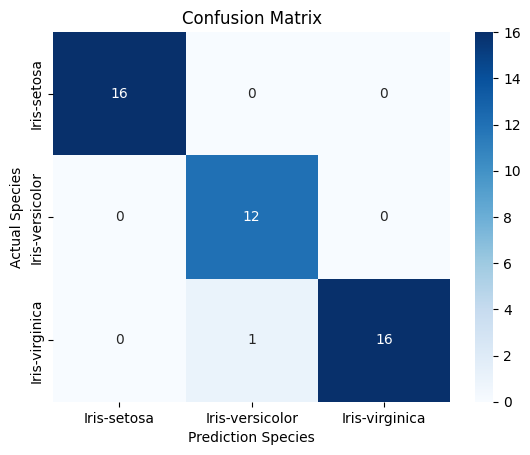

In [77]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Prediction Species')
ax.set_ylabel('Actual Species')

### Save Model for Application

In [78]:
model.save(os.path.join('models', 'IRIS_prediction.h5'))